# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [79]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [80]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | ta`u
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | vernon
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | lazaro cardenas
Processing Record 16 of Set 1 | tabou
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | conception bay south
Processing Record 20 of Set 1 | fortuna
Processing Record 21 of Set 1 | mount isa
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | puerto 

Processing Record 39 of Set 4 | espargos
City not found. Skipping...
Processing Record 40 of Set 4 | petropavl
Processing Record 41 of Set 4 | hawaiian paradise park
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | remire-montjoly
Processing Record 44 of Set 4 | vorkuta
Processing Record 45 of Set 4 | tarawa
Processing Record 46 of Set 4 | lucapa
Processing Record 47 of Set 4 | porto novo
Processing Record 48 of Set 4 | tidjikja
Processing Record 49 of Set 4 | dunedin
Processing Record 0 of Set 5 | blama
Processing Record 1 of Set 5 | ayaguz
City not found. Skipping...
Processing Record 2 of Set 5 | caleta de carquin
Processing Record 3 of Set 5 | kawthoung
City not found. Skipping...
Processing Record 4 of Set 5 | tobi village
City not found. Skipping...
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | atafu village
Processing Record 7 of Set 5 | waegwan
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | keflavik
Processing 

Processing Record 27 of Set 8 | talakan
Processing Record 28 of Set 8 | shitanjing
Processing Record 29 of Set 8 | musoma
Processing Record 30 of Set 8 | coxen hole
Processing Record 31 of Set 8 | beau vallon
Processing Record 32 of Set 8 | kinik
Processing Record 33 of Set 8 | greenwood
Processing Record 34 of Set 8 | lib
Processing Record 35 of Set 8 | manokwari
Processing Record 36 of Set 8 | xiaoshi
Processing Record 37 of Set 8 | 'ibri
City not found. Skipping...
Processing Record 38 of Set 8 | kamin-kashyrskyi
Processing Record 39 of Set 8 | rongelap
Processing Record 40 of Set 8 | chonchi
Processing Record 41 of Set 8 | blanchard
Processing Record 42 of Set 8 | penal
Processing Record 43 of Set 8 | surovikino
Processing Record 44 of Set 8 | karak city
Processing Record 45 of Set 8 | houghton
Processing Record 46 of Set 8 | as suwayq
Processing Record 47 of Set 8 | benguela
Processing Record 48 of Set 8 | martapura
Processing Record 49 of Set 8 | taro
Processing Record 0 of Set 9

Processing Record 14 of Set 12 | gudiyatham
Processing Record 15 of Set 12 | tabas
Processing Record 16 of Set 12 | ivdel'
Processing Record 17 of Set 12 | penonome
Processing Record 18 of Set 12 | kyshtovka
Processing Record 19 of Set 12 | bayan nur
City not found. Skipping...
Processing Record 20 of Set 12 | cidreira
Processing Record 21 of Set 12 | pudozh
Processing Record 22 of Set 12 | charters towers
Processing Record 23 of Set 12 | partenit
Processing Record 24 of Set 12 | cannonvale
Processing Record 25 of Set 12 | astara
Processing Record 26 of Set 12 | torghay
Processing Record 27 of Set 12 | bonab
Processing Record 28 of Set 12 | kushiro
Processing Record 29 of Set 12 | tazacorte
Processing Record 30 of Set 12 | tokar
Processing Record 31 of Set 12 | domna
Processing Record 32 of Set 12 | buala
Processing Record 33 of Set 12 | antsiranana
Processing Record 34 of Set 12 | gaigeturi
Processing Record 35 of Set 12 | onega
Processing Record 36 of Set 12 | berezivka
Processing Re

In [81]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [82]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lorengau,-2.0226,147.2712,300.21,82,100,4.61,PG,1689371453
1,bethel,41.3712,-73.4140,300.64,77,40,4.63,US,1689370878
2,carnarvon,-24.8667,113.6333,286.84,64,0,9.01,AU,1689371000
3,portland,45.5234,-122.6762,307.10,33,0,4.12,US,1689371159
4,laguna,38.4210,-121.4238,312.62,25,0,4.12,US,1689371085


In [83]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [84]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,300.21,82,100,4.61,PG,1689371453
1,bethel,41.3712,-73.4140,300.64,77,40,4.63,US,1689370878
2,carnarvon,-24.8667,113.6333,286.84,64,0,9.01,AU,1689371000
3,portland,45.5234,-122.6762,307.10,33,0,4.12,US,1689371159
4,laguna,38.4210,-121.4238,312.62,25,0,4.12,US,1689371085


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

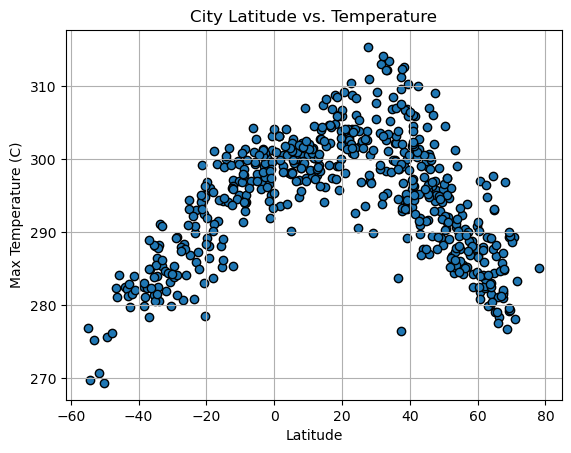

In [85]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True,linestyle='-')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

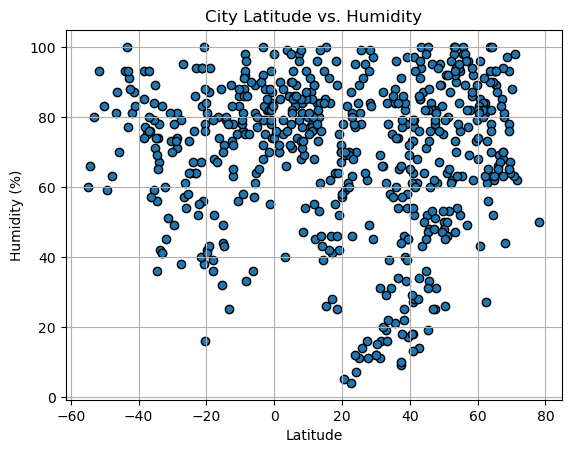

In [86]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

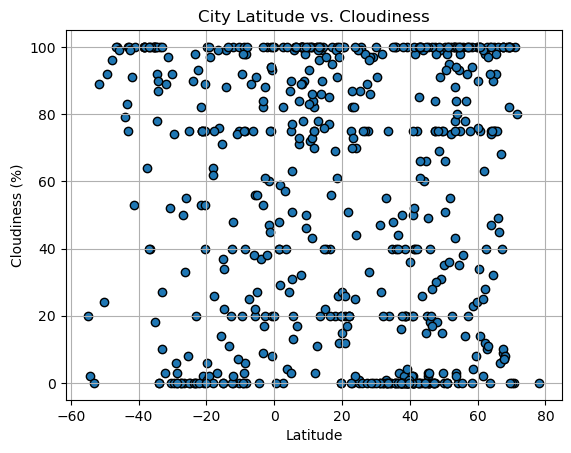

In [87]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

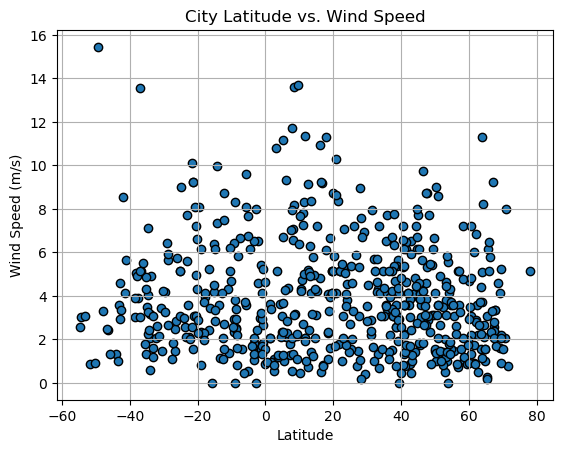

In [88]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True,linestyle='-')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots


def LR_plots(x_axis,y_axis,xlabel,ylabel,annotate_coords,save_path):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    
    #calculating line equation.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    
    #plotting scatter plot.
    plt.scatter(x_axis,y_axis,marker='o')
    
    #plotting linear regression
    plt.plot(x_axis,regress_values,"r-")
    
    #adding equation of line to plot.
    plt.annotate(line_eq,annotate_coords,fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.savefig("output_data/"+save_path)
    plt.show()
    

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df=city_data_df[city_data_df['Lat']>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,300.64,77,40,4.63,US,1689370878
3,portland,45.5234,-122.6762,307.10,33,0,4.12,US,1689371159
4,laguna,38.4210,-121.4238,312.62,25,0,4.12,US,1689371085
7,thompson,55.7435,-97.8558,284.24,100,100,3.09,CA,1689370924
8,iqaluit,63.7506,-68.5145,280.00,100,100,1.54,CA,1689370913


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df=city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lorengau,-2.0226,147.2712,300.21,82,100,4.61,PG,1689371453
2,carnarvon,-24.8667,113.6333,286.84,64,0,9.01,AU,1689371000
5,ta`u,-14.2336,-169.5144,300.01,79,99,7.36,AS,1689371003
6,alofi,-19.0595,-169.9187,296.09,94,97,6.17,NU,1689371117
10,port elizabeth,-33.9180,25.5701,288.31,67,0,2.06,ZA,1689370640


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6635971755282167


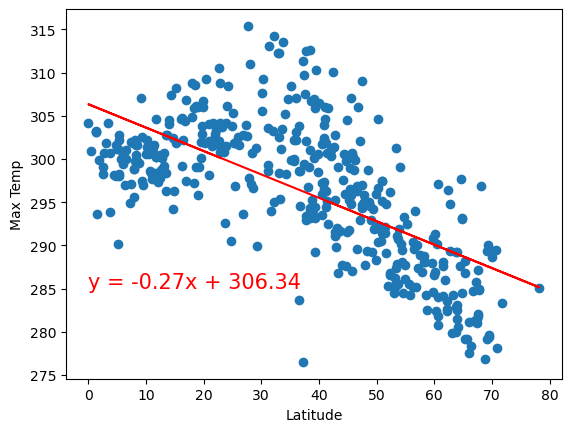

In [92]:
# Linear regression on Northern Hemisphere

#function call to plot latitude vs Max Temp for northern hemisphere.
LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp',(0,285),'Fig5.png')



The r-value is: 0.8633203017489351


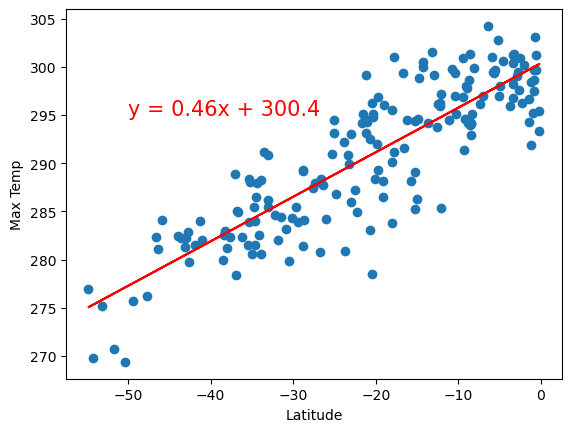

In [96]:
# Linear regression on Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp',(-50,295),'Fig6.png')

**Discussion about the linear relationship:** For Northen Hemisphere we can observe that with increase in latitude the Max temp decreases. Whereas for southern hemisphere the Max temp increase with increase in latitude. So we can say that maximum temperature is observed near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.036184639778000495


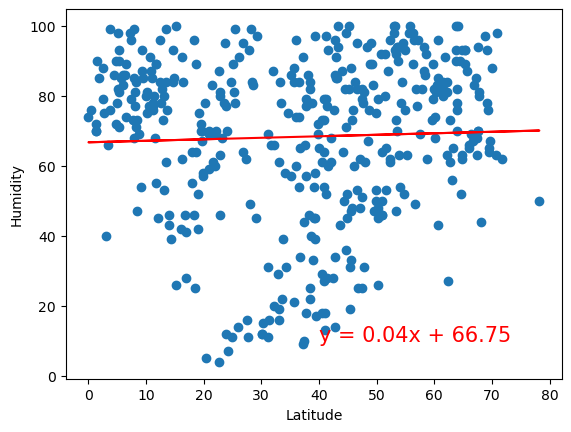

In [97]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity',(40,10),'Fig7.png')

The r-value is: 0.06992724946933494


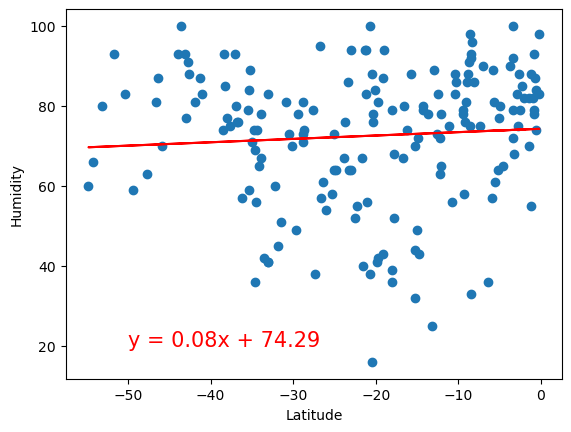

In [98]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity',(-50,20),'Fig8.png')

**Discussion about the linear relationship:** From above plots we can see for Northern Hemisphere the humidity remains almost unaffected with change in latitude. For southern hemisphere we can observe a very slight increase in humidity with increase in latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05177604511645082


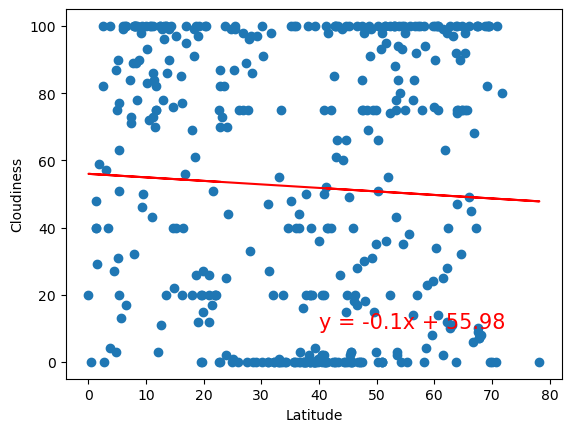

In [99]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness',(40,10),'Fig9.png')

The r-value is: -0.11957649232233844


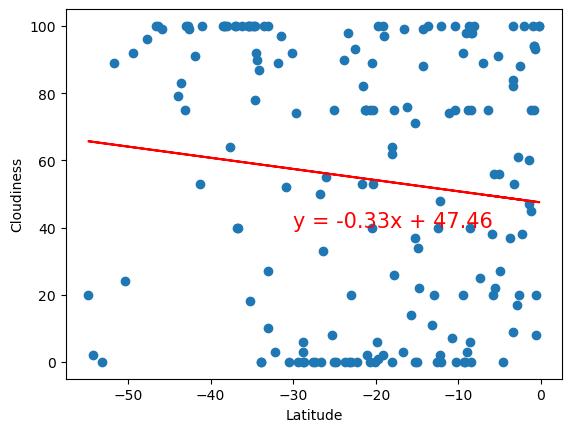

In [100]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness',(-30,40),'Fig10.png')

**Discussion about the linear relationship:** From above plots we can see for Northern Hemisphere the Cloudiness drops slightly with increase in latitude. For southern hemisphere we can observe a drop in Cloudiness with increase in latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16391441649420274


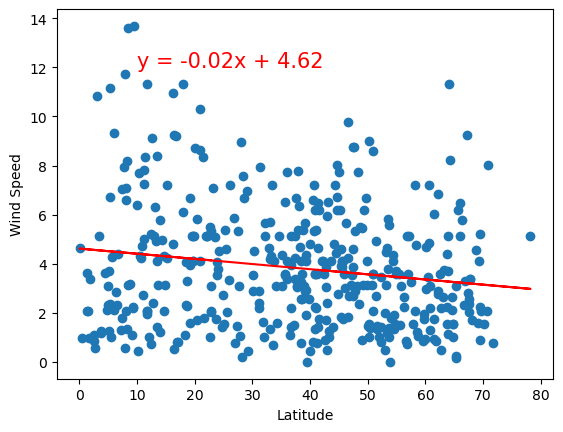

In [101]:
# Northern Hemisphere

LR_plots(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed',(10,12),'Fig11.png')

The r-value is: -0.03235205246309379


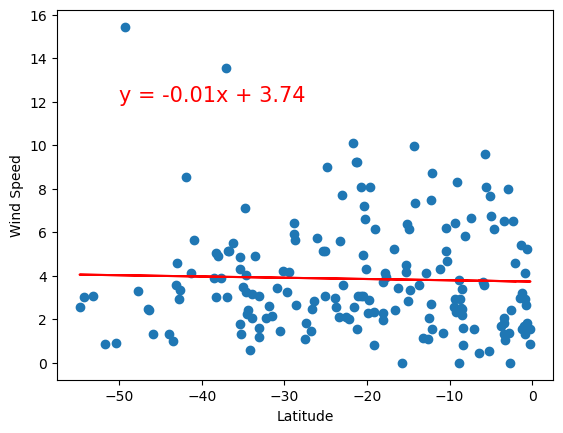

In [102]:
# Southern Hemisphere

LR_plots(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed',(-50,12),'Fig12.png')

**Discussion about the linear relationship:** From above plots we can see for both Hemispheres the Wind speed remains unaffected with change in latitude. Also it is observed that majority of the cities in both the hemispheres have wind speed lower than 5(m/s).